<a href="https://colab.research.google.com/github/KipeGithub/Referensi2-QP-ML-Dadang-/blob/main/code/QP_Reference_II_labeling_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**memanggil data**

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/Data_gabung/data_review_clean.xlsx')


df.head(5)

Mounted at /content/drive


,Review_clean
0,bagus ajak anak main foto bagus
1,anak anak suka kesini
2,tempat bikin nyaman
3,kecewa
4,koleksi hewan bagus


In [ ]:
df = df.dropna(subset=['Review_clean'])
df

,Review_clean
0,bagus ajak anak main foto bagus
1,anak anak suka kesini
2,tempat bikin nyaman
3,kecewa
4,koleksi hewan bagus
...,...
8711,kota cicalengka dalem jalur pas sampe jalan ba...
8712,pilih wisata warga wilayah cicalengka
8713,bagus ramai stand makan wahana suka foto lumay...
8714,layan


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.9 MB/s eta 0:00:00


**memanggil library transformer**

In [ ]:
from transformers import pipeline

pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
df['label'] = df['Review_clean']

In [ ]:
df_labor = (
    df
    .assign(sentiment = lambda x: x['label'].apply(lambda s: nlp(s)))
    .assign(
        label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
        # score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
    )
)

In [ ]:
print(df_labor)

                                           Review_clean     label  \
0                       bagus ajak anak main foto bagus  positive   
1                                 anak anak suka kesini  positive   
2                                   tempat bikin nyaman  positive   
3                                                kecewa  negative   
4                                   koleksi hewan bagus  positive   
...                                                 ...       ...   
8711  kota cicalengka dalem jalur pas sampe jalan ba...  positive   
8712              pilih wisata warga wilayah cicalengka  positive   
8713  bagus ramai stand makan wahana suka foto lumay...  positive   
8714                                              layan  positive   
8715                                             siippp  positive   

                                              sentiment  
0     [{'label': 'positive', 'score': 0.999116003513...  
1     [{'label': 'positive', 'score': 0.998948872089...

**label yang dihasilkan**

In [ ]:
df_labor["label"].value_counts()

positive    6612
negative    1113
neutral      884
Name: label, dtype: int64

In [ ]:
data_label = pd.DataFrame(df_labor[['Review_clean', 'label']])
data_label.head()

,Review_clean,label
0,bagus ajak anak main foto bagus,positive
1,anak anak suka kesini,positive
2,tempat bikin nyaman,positive
3,kecewa,negative
4,koleksi hewan bagus,positive


In [ ]:
# data_label.to_excel('/content/drive/MyDrive/Data_gabung/label.xlsx', index = False)

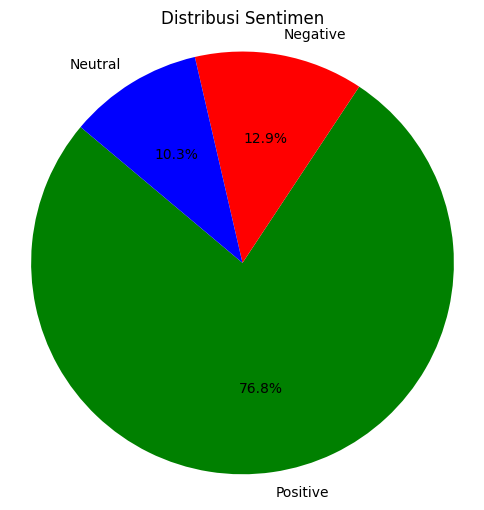

In [ ]:
import matplotlib.pyplot as plt

# Data sentimen dari DataFrame df_labor
sentimen_counts = [6612, 1113, 884]
labels = ['Positive', 'Negative', 'Neutral']
colors = ['green', 'red', 'blue']

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentimen_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Sentimen')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()


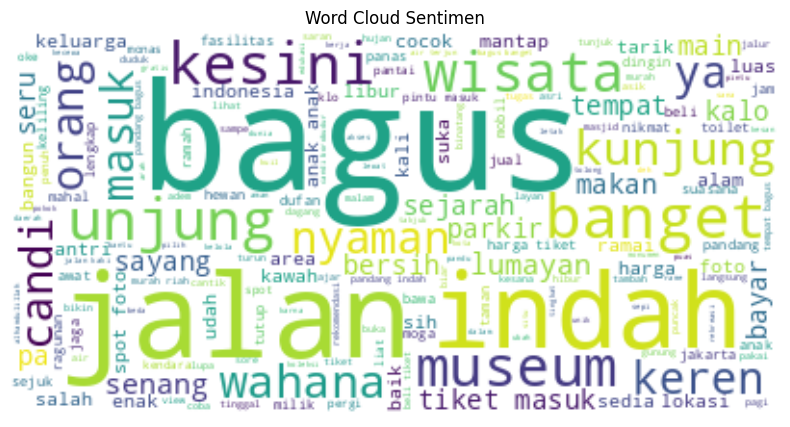

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(i for i in df.Review_clean)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud Sentimen")
plt.axis("off")
plt.show()

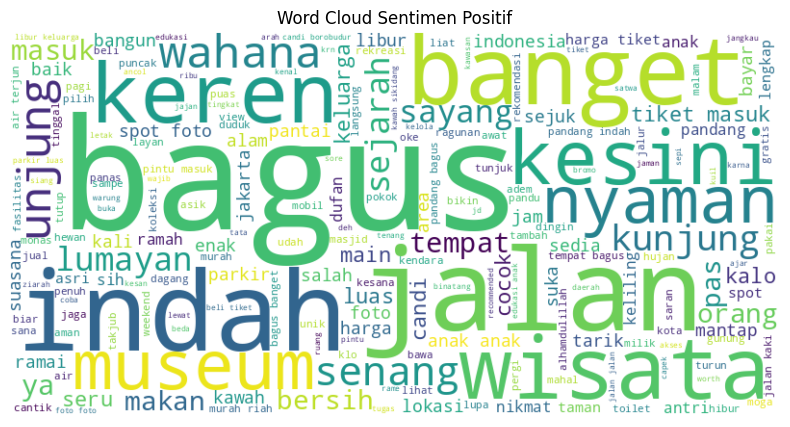

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Data sentimen dari DataFrame df_labor
data_positive = df_labor[df_labor["label"] == "positive"]
all_words = " ".join([text for text in data_positive['Review_clean']])

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud Sentimen Positif")
plt.axis("off")
plt.show()


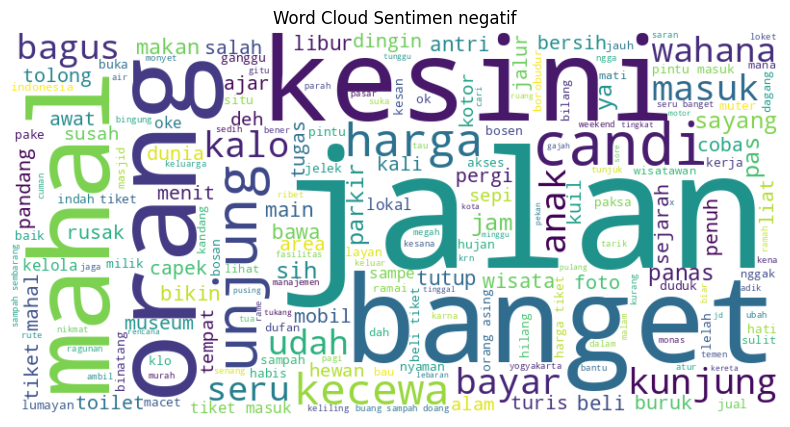

In [ ]:
# Data sentimen dari DataFrame df_labor
data_negative = df_labor[df_labor["label"] == "negative"]
all_words = " ".join([text for text in data_negative['Review_clean']])

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud Sentimen negatif")
plt.axis("off")
plt.show()

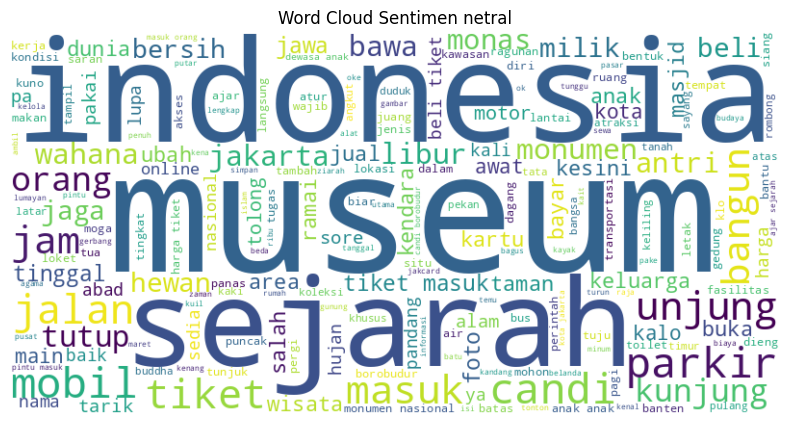

In [ ]:
# Data sentimen dari DataFrame df_labor
data_neutral = df_labor[df_labor["label"] == "neutral"]
all_words = " ".join([text for text in data_neutral['Review_clean']])

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud Sentimen netral")
plt.axis("off")
plt.show()

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Data_gabung/label.xlsx')

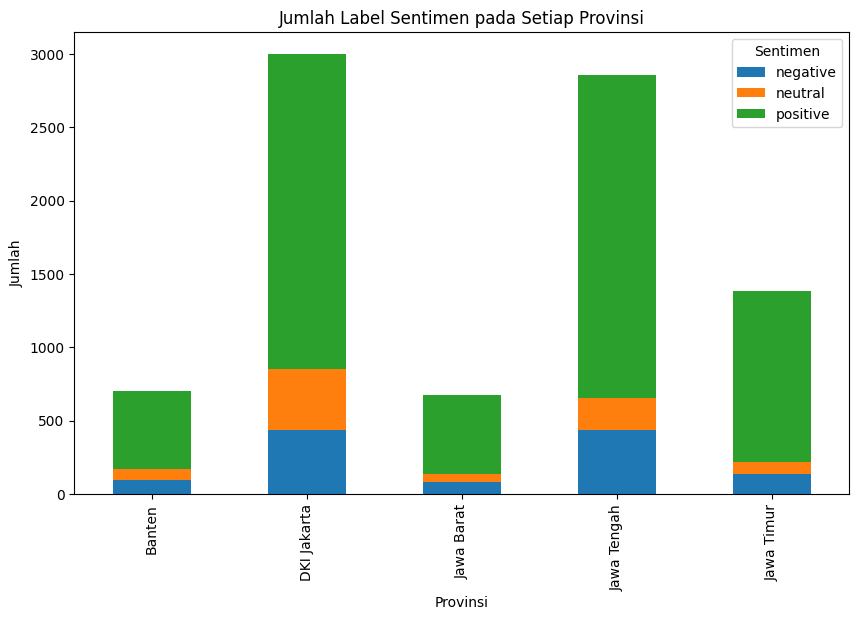

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Grouping data berdasarkan Provinsi dan menghitung jumlah label sentimen
grouped_data = df.groupby(['Provinsi', 'label']).size().reset_index(name='Count')

# Membuat pivot table untuk mendapatkan kategori sentimen sebagai kolom pada DataFrame
pivot_table = grouped_data.pivot(index='Provinsi', columns='label', values='Count').fillna(0)

# Membuat bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Menambahkan label pada sumbu x dan y serta judul pada grafik
plt.xlabel('Provinsi')
plt.ylabel('Jumlah')
plt.title('Jumlah Label Sentimen pada Setiap Provinsi')
plt.legend(title='Sentimen', loc='upper right')

# Menampilkan grafik
plt.show()


In [ ]:
# Jumlah sentimen positif, negatif, dan netral
positif = 5260
negatif = 794
netral = 2561

# Mencari kelas mayoritas dan jumlah sampelnya
kelas_mayoritas = max(positif, negatif, netral)
jumlah_kelas_mayoritas = positif + negatif + netral - kelas_mayoritas

# Menghitung perbandingan kelas mayoritas dengan kelas minoritas
perbandingan = jumlah_kelas_mayoritas / kelas_mayoritas

print("Perbandingan data:")
print(f"Perbandingan kelas mayoritas dengan kelas minoritas: {perbandingan:.2f}")


Perbandingan data:
Perbandingan kelas mayoritas dengan kelas minoritas: 0.64
